
```
Student ID: 2357572
Student Name: Suraj Kanwar
```



In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Task 1: Data Understanding and Visualization:


* Load and visualize images from the dataset in directories by class.
* Randomly select one image per class and display in a 2-row grid using matplotlib.

In [98]:
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:5/FruitinAmazon/test"

Task 1: Data Understanding and Visualization
Question: Load and visualize images from a dataset stored in directories, where each subdirectory represents a class.


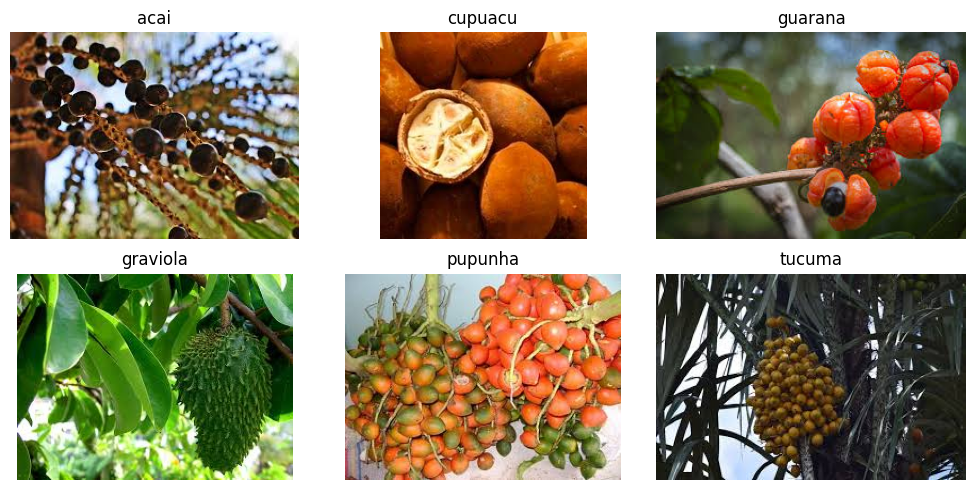

Observation: Images from each fruit class are displayed, showing visual differences between classes.


In [99]:
# Task 1: Data Understanding and Visualization
print("Task 1: Data Understanding and Visualization")
print("Question: Load and visualize images from a dataset stored in directories, where each subdirectory represents a class.")
class_dirs = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
images = []
class_names = []

for class_dir in class_dirs:
    img_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img_path = os.path.join(class_dir, np.random.choice(img_files))
        img = Image.open(img_path)
        images.append(img)
        class_names.append(os.path.basename(class_dir))

# Display images in a 2-row grid
plt.figure(figsize=(10, 5))
for i, (img, name) in enumerate(zip(images, class_names)):
    plt.subplot(2, len(images)//3 + 1, i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Observation: Images from each fruit class are displayed, showing visual differences between classes.")

#Task 2: Check for Corrupted Images:

* Verify images in the train directory for corruption.
* Remove corrupted images and report them, or print "No Corrupted Images Found."

In [100]:
# Task 2: Check for Corrupted Images
print("\nTask 2: Check for Corrupted Images")
print("Question: Write a script that verifies whether the images in the train directory are valid and removes corrupted ones.")
corrupted_images = []
for class_dir in class_dirs:
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except (IOError, SyntaxError):
            corrupted_images.append(img_path)
            os.remove(img_path)
            print(f"Removed corrupted image: {img_path}")

if not corrupted_images:
    print("No corrupted images found.")
else:
    print(f"Removed {len(corrupted_images)} corrupted images.")


Task 2: Check for Corrupted Images
Question: Write a script that verifies whether the images in the train directory are valid and removes corrupted ones.
No corrupted images found.


#Task 3: Implement a CNN:

* Build a CNN with specified layers: Conv2D (32, 3x3, same, ReLU), MaxPooling2D (2x2), Conv2D (32, 3x3, same, ReLU), MaxPooling2D (2x2), Flatten, Dense (64), Dense (128), Dense (num_classes).

In [101]:
print("\nTask 3: Implement a CNN")
print("Question: Load and preprocess image data, then implement a CNN with specified architecture.")

# Define image size and batch size
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2

# Load and preprocess train and validation data
rescale = layers.Rescaling(1./255)
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=(img_height, img_width), batch_size=batch_size,
    validation_split=validation_split, subset="training", seed=123
).map(lambda x, y: (rescale(x), y))
val_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=(img_height, img_width), batch_size=batch_size,
    validation_split=validation_split, subset="validation", seed=123
).map(lambda x, y: (rescale(x), y))

# Load test data
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size=(img_height, img_width), batch_size=batch_size,
    shuffle=False  # No shuffling for evaluation/predictions
).map(lambda x, y: (rescale(x), y))

# Define CNN model with explicit Input layer
num_classes = 6  # Based on your output (6 classes)
model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Optional: Print model summary to verify
model.summary()


Task 3: Implement a CNN
Question: Load and preprocess image data, then implement a CNN with specified architecture.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

#Task 4: Compile and Train the Model:

* Compile with optimizer (e.g., Adam), loss (e.g., sparse categorical crossentropy), and metric (e.g., accuracy).
* Train using model.fit() with batch size 16, 250 epochs, validation data, and callbacks (ModelCheckpoint, EarlyStopping).


Task 4: Compile and Train the Model
Question: Compile the model with an optimizer, loss function, and metric, then train it with callbacks.
Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.1389 - loss: 1.8523

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.1458 - loss: 1.8548 - val_accuracy: 0.2222 - val_loss: 1.9699
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.2836 - loss: 1.6822

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 0.2925 - loss: 1.6725 - val_accuracy: 0.2222 - val_loss: 1.6802
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.4439 - loss: 1.4313

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - accuracy: 0.4510 - loss: 1.4209 - val_accuracy: 0.3333 - val_loss: 1.6086
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 779ms/step - accuracy: 0.5820 - loss: 1.1971 - val_accuracy: 0.3889 - val_loss: 1.6289
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.5629 - loss: 1.0234 - val_accuracy: 0.3333 - val_loss: 1.7174
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.5990 - loss: 0.8302

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.6055 - loss: 0.8363 - val_accuracy: 0.3889 - val_loss: 1.5375
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 497ms/step - accuracy: 0.8828 - loss: 0.5628 - val_accuracy: 0.3889 - val_loss: 1.9925
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.8084 - loss: 0.6161

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - accuracy: 0.8181 - loss: 0.5984 - val_accuracy: 0.4444 - val_loss: 1.4587
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9601 - loss: 0.3020

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.9596 - loss: 0.3071 - val_accuracy: 0.5000 - val_loss: 1.4175
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 706ms/step - accuracy: 0.9783 - loss: 0.2114 - val_accuracy: 0.5000 - val_loss: 1.6186
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.9813 - loss: 0.1608 - val_accuracy: 0.5000 - val_loss: 1.8441
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 1.0000 - loss: 0.0903 - val_accuracy: 0.5000 - val_loss: 1.8469
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 1.0000 - loss: 0.0525 - val_accuracy: 0.4444 - val_loss: 1.8247
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.4444 - val_loss: 2.1689
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.5000 - val_loss: 2.4827
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.5000 - val_lo

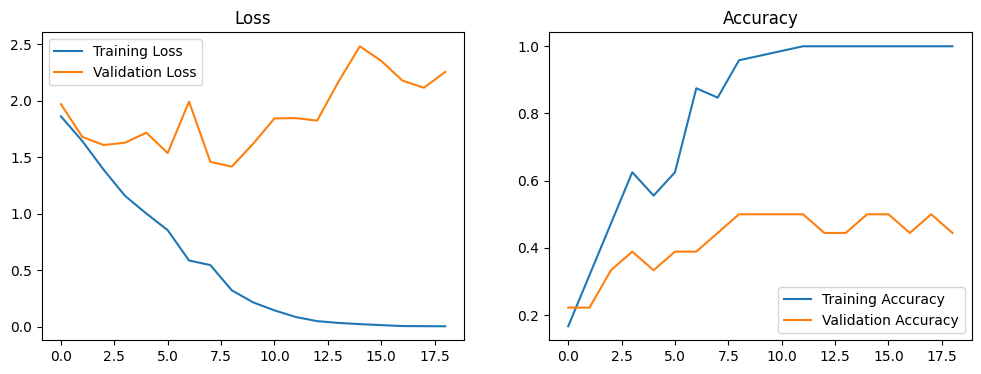

In [102]:
# Task 4: Compile and Train the Model
print("\nTask 4: Compile and Train the Model")
print("Question: Compile the model with an optimizer, loss function, and metric, then train it with callbacks.")
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]
history = model.fit(train_ds, epochs=250, validation_data=val_ds, batch_size=16, callbacks=callbacks)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

#Task 5: Evaluate the Model:

* Evaluate model performance on the test set using model.evaluate().

In [103]:
# Task 5: Evaluate the Model
print("\nTask 5: Evaluate the Model")
print("Question: Evaluate the model on the test set to check accuracy and loss.")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


Task 5: Evaluate the Model
Question: Evaluate the model on the test set to check accuracy and loss.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7667 - loss: 0.8728
Test accuracy: 0.7667, Test loss: 0.8728


#Task 6: Save and Load the Model:

* Save the trained model to an .h5 file.
* Load the model and re-evaluate on the test set.

In [104]:
# Task 6: Save and Load the Model
print("\nTask 6: Save and Load the Model")
print("Question: Save the trained model to an .h5 file and load it to re-evaluate.")
model.save('my_model.keras')
loaded_model = keras.models.load_model("final_model.h5")
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_ds)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}, Test loss: {loaded_test_loss:.4f}")


Task 6: Save and Load the Model
Question: Save the trained model to an .h5 file and load it to re-evaluate.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 0.7667 - loss: 0.7054
Loaded model test accuracy: 0.7667, Test loss: 0.7054


#Task 7: Predictions and Classification Report:

* Predict on test images using model.predict().
Convert predictions to labels with np.argmax().
* Generate a classification report using sklearn.metrics.classification_report.


Task 7: Predictions and Classification Report
Question: Make predictions on test images and generate a classification report.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
              precision    recall  f1-score   support

        acai       0.83      1.00      0.91         5
     cupuacu       1.00      0.20      0.33         5
     guarana       0.50      1.00      0.67         5
    graviola       1.00      1.00      1.00         5
     pupunha       1.00      1.00      1.00         5
      tucuma       0.67      0.40      0.50         5

    accuracy                           0.77        30
   macro avg       0.83      0.77      0.73        30
weighted avg       0.83      0.77      0.73        30



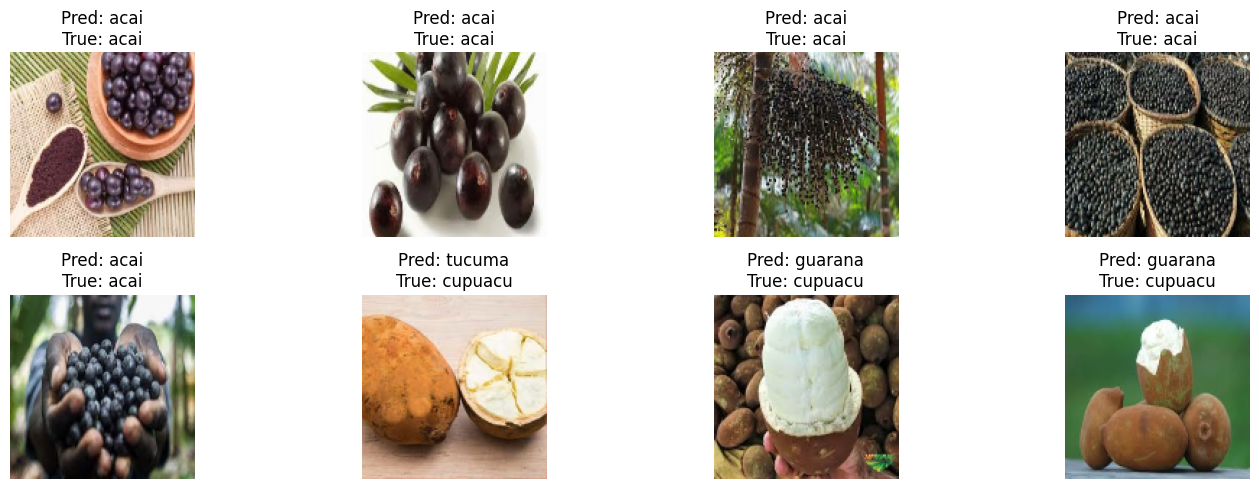

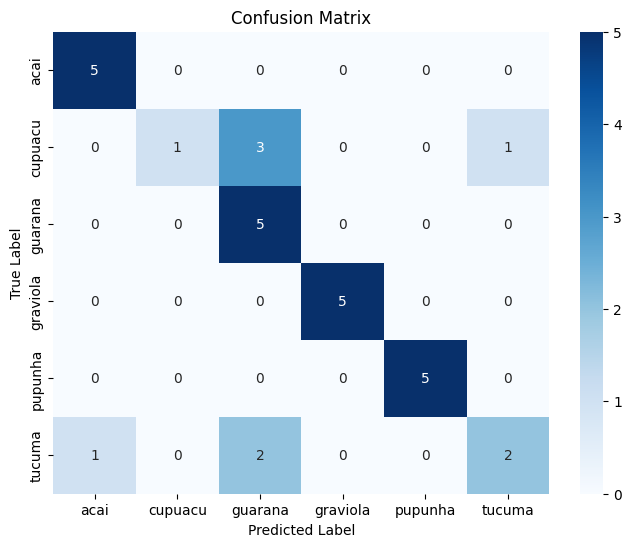


Deliverables completed: Code, visualizations, classification report, and saved model (final_model.h5).


In [105]:
# Task 7: Predictions and Classification Report with Visualizations
print("\nTask 7: Predictions and Classification Report")
print("Question: Make predictions on test images and generate a classification report.")
predictions = loaded_model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
y_true = np.concatenate([y.numpy() for _, y in test_ds])
print(classification_report(y_true, y_pred, target_names=class_names))

# Display fruit images with predicted and true labels
test_images, test_labels = next(iter(test_ds))
plt.figure(figsize=(15, 5))
for i in range(min(8, len(test_images))):
    plt.subplot(2, 4, i+1)
    plt.imshow(test_images[i].numpy())
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[test_labels[i].numpy()]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nDeliverables completed: Code, visualizations, classification report, and saved model (final_model.h5).")